In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers=pd.read_csv('Downloads/ze/Customers.csv')

In [3]:
products=pd.read_csv('Downloads/ze/Products.csv')

In [4]:
transactions=pd.read_csv('Downloads/ze/Transactions.csv')

In [5]:
customers.sample(5)

,CustomerID,CustomerName,Region,SignupDate
109,C0110,Elizabeth Wells,Asia,2024-09-21
192,C0193,Douglas Torres,Asia,2023-02-03
21,C0022,Teresa Esparza,Asia,2023-10-27
186,C0187,Kayla Kelly,South America,2024-08-02
3,C0004,Kathleen Rodriguez,South America,2022-10-09


In [6]:
products.sample(5)

,ProductID,ProductName,Category,Price
98,P099,SoundWave Mystery Book,Books,354.29
68,P069,BookWorld Biography,Books,100.81
9,P010,ComfortLiving Smartwatch,Electronics,350.13
12,P013,BookWorld Smartwatch,Electronics,114.20
41,P042,ActiveWear Headphones,Electronics,379.44


In [7]:
transactions.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
903,T00707,C0170,P094,2024-05-27 15:48:49,3,1342.02,447.34
629,T00505,C0147,P066,2024-07-29 19:28:48,2,674.44,337.22
438,T00742,C0124,P022,2024-03-23 05:53:50,2,275.08,137.54
717,T00870,C0187,P018,2024-05-02 14:16:38,4,1747.56,436.89
562,T00224,C0171,P017,2024-07-06 23:53:24,4,1879.08,469.77


## Exploratory Data Analysis(EDA)

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [10]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [13]:
category_counts = products['Category'].value_counts()

In [14]:
category_counts

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

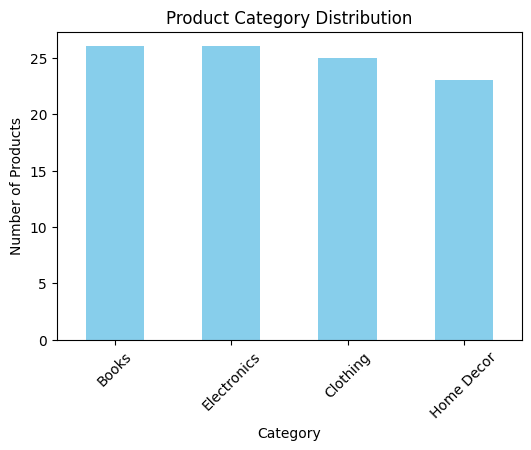

In [19]:
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

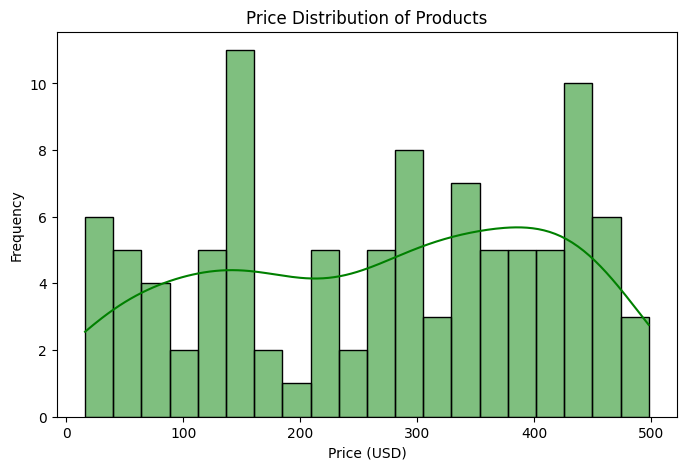

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='green')
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [21]:
print(products['Price'].describe())

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [22]:
merged_data = pd.merge(transactions, products, on='ProductID', how='inner')
merged_data = pd.merge(merged_data, customers, on='CustomerID', how='inner')

In [23]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,HomeSense Wall Art,Home Decor,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,ActiveWear Rug,Home Decor,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,BookWorld Bluetooth Speaker,Electronics,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,SoundWave Smartwatch,Electronics,16.08,William Walker,South America,2023-03-04
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,ActiveWear Rug,Home Decor,417.37,William Walker,South America,2023-03-04
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,ComfortLiving Rug,Home Decor,55.99,Amber Gonzalez,South America,2024-11-22
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,TechPro Textbook,Books,497.76,Julia Palmer,Asia,2024-11-13


#### Relationship Analysis

In [24]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

In [25]:
top_products

ProductName
ActiveWear Smartwatch       100
SoundWave Headphones         97
HomeSense Desk Lamp          81
ActiveWear Rug               79
SoundWave Cookbook           78
                           ... 
HomeSense Headphones         18
SoundWave Laptop             16
SoundWave Jacket             16
BookWorld Wall Art           15
ComfortLiving Headphones     15
Name: Quantity, Length: 66, dtype: int64

##### Products in the ActiveWear Smartwatch and SoundWave Headphones have consistently generated the highest sales. Offering discounts or bundling these popular products with slower-moving items can help increase overall revenue.

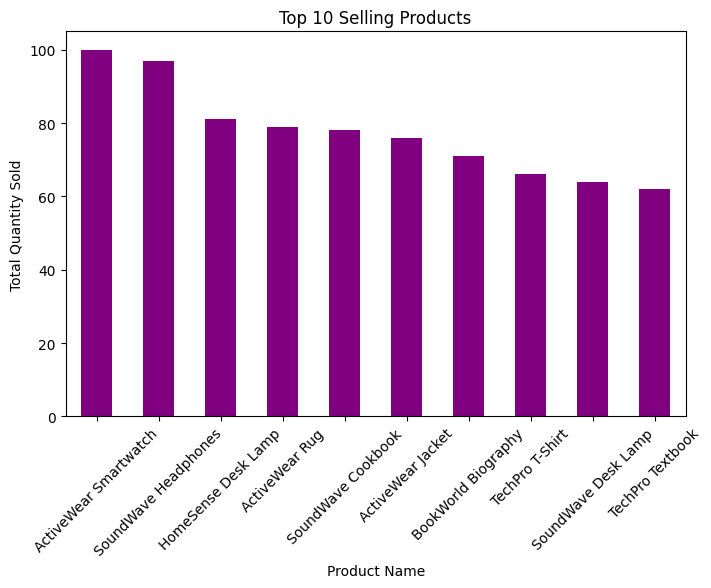

In [27]:
plt.figure(figsize=(8, 5))
top_products.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [28]:
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

In [30]:
customer_spending

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
           ...   
C0014      318.66
C0151      223.96
C0097      137.54
C0033      132.64
C0060       82.36
Name: TotalValue, Length: 199, dtype: float64

##### Customers from Asia tend to make repeat purchases more frequently. Focusing on customer retention programs and personalized marketing for these regions can boost customer lifetime value.

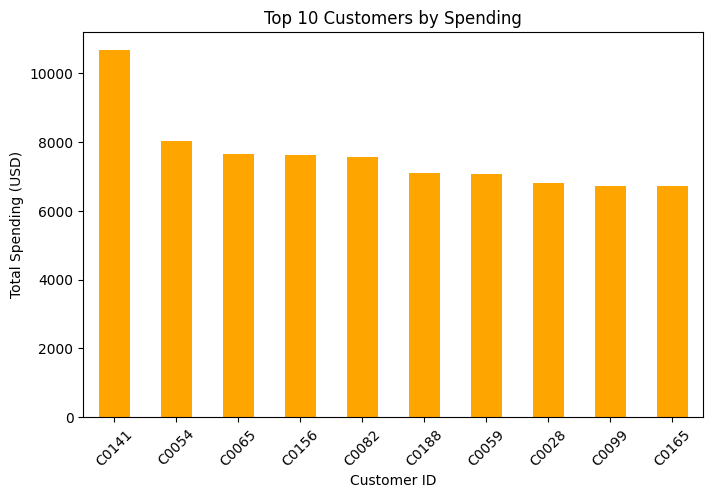

In [32]:
plt.figure(figsize=(8, 5))
customer_spending.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()

In [33]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()

In [34]:
category_revenue

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64

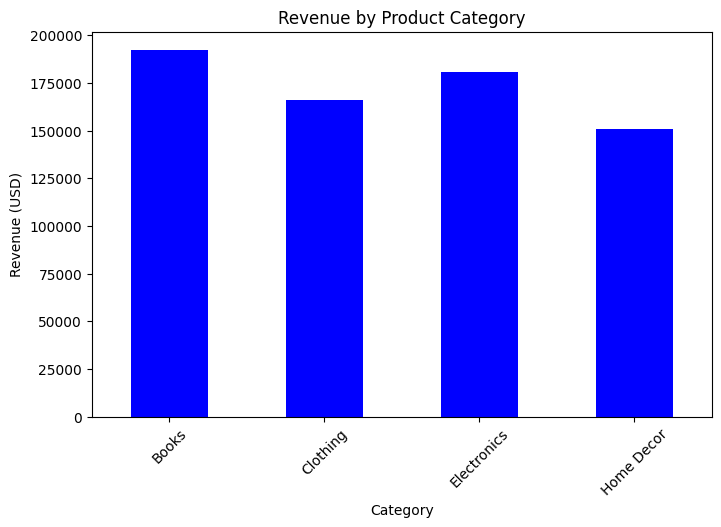

In [35]:
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='blue')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

In [36]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

In [38]:
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

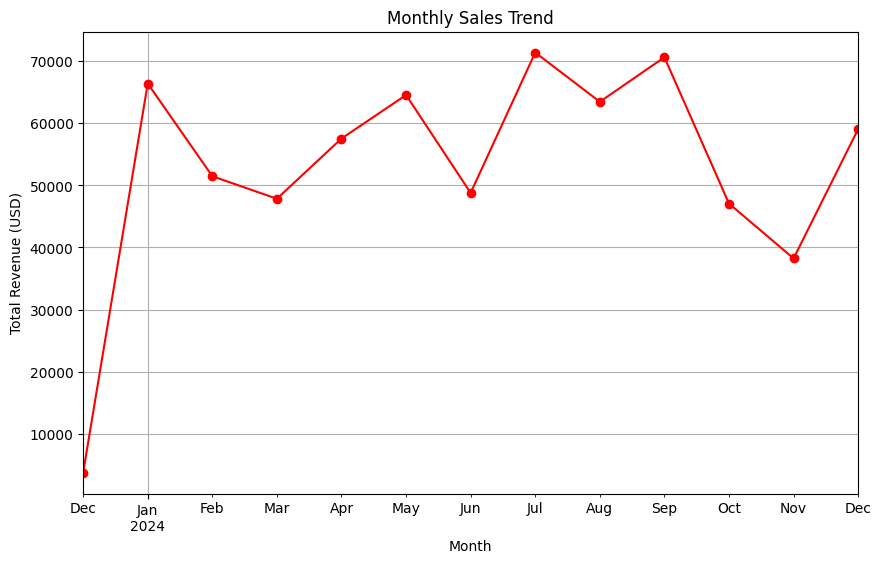

In [39]:
sales_trend.plot(kind='line', figsize=(10, 6), marker='o', color='red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid()
plt.show()